<a href="https://colab.research.google.com/github/dholzmann/Learn_TensorFlow/blob/main/TF_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow - Linear Regression

Installing TensorFlow version 2.2.0 and its required prerequistes:

In [ ]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.2.0

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

Download a dataset that is related to fuel consumption and Carbon dioxide emission of cars:

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

*    MODELYEAR e.g. 2014
*    MAKE e.g. Acura
*    MODEL e.g. ILX
*    VEHICLE CLASS e.g. SUV
*    ENGINE SIZE e.g. 4.7
*    CYLINDERS e.g 6
*    TRANSMISSION e.g. A6
*    FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
*    FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
*    FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
*    CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [ ]:
df = pd.read_csv("FuelConsumption.csv")
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Use linear regression to predict Co2Emission of cars based on their engine size:

In [ ]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

Initialize the variables a and b, with any random guess:

In [ ]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)

Define linear function:

In [ ]:
def h(x):
   y = a*x + b
   return y

Minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have).
Define a loss function for our regression:

To find value of our loss, we use tf.reduce_mean(). This function finds the mean of a multidimensional tensor, and the result can have a different dimension.

In [ ]:
def loss_object(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))
    # Below is a predefined method offered by TensorFlow to calculate loss function
    #loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

Now we are ready to start training and run the graph. We use GradientTape to calculate gradients:

In [ ]:
learning_rate = 0.01
train_data = []
loss_values =[]
# steps of looping through all your data to update the parameters
training_epochs = 200

# train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_object(train_y,y_predicted)
        loss_values.append(loss_value)

        # get gradients
        gradients = tape.gradient(loss_value, [b,a])
        
        # compute and adjust weights
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

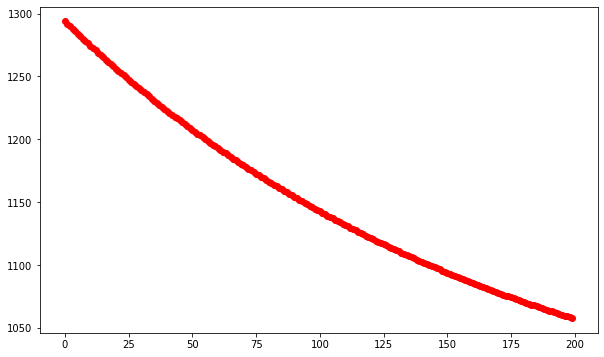

In [ ]:
plt.plot(loss_values, 'ro')

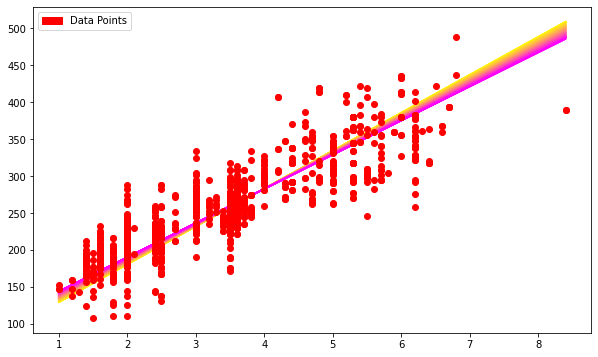

In [ ]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')
green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()